In [18]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cnames = ['ref_name', 'ref_dir', 'read_name', 
          'nanostar_ref_len', 'nanostar_ref_start', 'nanostar_read_len', 
          'nanostar_alignment_len', 'nanostar_identity', 'nanostar_insertion', 'nanostar_deletion' , 'nanostar_mismatch',  
          'star_ref_len', 'star_ref_start', 'star_read_len', 
          'star_alignment_len', 'star_identity', 'star_insertion', 'star_deletion' , 'star_mismatch', 'status']
df_details = pd.read_csv('../combine_lab/NanoSTAR_vs_STAR_comparison.detail', 
                 header=None, names=cnames)

In [19]:
summary = df_details.describe()
summary.transpose()

,count,mean,std,min,25%,50%,75%,max
ref_dir,1797798.0,242.871781,133.543061,83.0,99.0,163.0,355.0,419.0
nanostar_ref_len,1797798.0,53.998132,0.148617,36.0,54.0,54.0,54.0,54.0
nanostar_ref_start,1797798.0,2340.202507,3095.825228,1.0,628.0,1424.0,2931.0,72357.0
nanostar_read_len,1797798.0,54.000000,0.000000,54.0,54.0,54.0,54.0,54.0
nanostar_alignment_len,1797798.0,54.001280,0.225467,36.0,54.0,54.0,54.0,62.0
nanostar_identity,1797798.0,53.793794,1.035428,31.0,54.0,54.0,54.0,54.0
nanostar_insertion,1797798.0,0.043544,0.378722,0.0,0.0,0.0,0.0,17.0
nanostar_deletion,1797798.0,0.031912,0.296027,0.0,0.0,0.0,0.0,10.0
nanostar_mismatch,1797798.0,0.132030,0.706171,0.0,0.0,0.0,0.0,15.0
star_ref_len,1797798.0,-0.248066,1.667678,-18.0,0.0,0.0,0.0,0.0


In [20]:
%matplotlib inline

In [23]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

criterion = df_details['status'].map(lambda x: 'Nano' in x or x.startswith('Different'))
only_nano = df_details[criterion]
print "Length of NanoSTAR = ", len(only_nano)

criterion = df_details['status'].map(lambda x: 'Last' in x or x.startswith('Different'))
only_last = df_details[criterion]
print "Length of STAR = ", len(only_last)


Length of NanoSTAR =  1797798
Length of STAR =  1797798


# Histogram of NanoSTAR Accuracy

Mean of %Identity =  99.6157756868
Length of NanoSTAR =  1797798


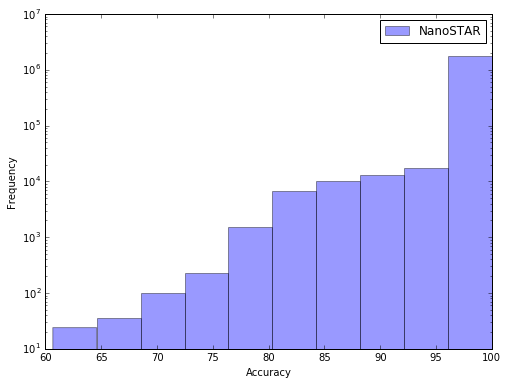

In [28]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))

criterion = only_nano['read_name'].map(lambda x: 'SRR' in x)
only_nanostar = 100.00 * only_nano[criterion]['nanostar_identity']/only_nano[criterion]['nanostar_alignment_len']
print "Mean of %Identity = ", (100.00 * sum(only_nano[criterion]['nanostar_identity'])/
                               sum(only_nano[criterion]['nanostar_alignment_len'])) 

only_nanostar = only_nanostar.values
print "Length of NanoSTAR = ", len(only_nanostar)

plt.xlabel("Accuracy")
plt.ylabel("Frequency")

plt.hist(only_nanostar, alpha=0.40, label='NanoSTAR')
plt.xlim(60, 100)
plt.yscale('log', nonposy='clip')

plt.legend(loc='upper right')
plt.show()

# Histogram of STAR Accuracy

Mean of %Identity =  99.5282038338
Length of STAR =  1797798


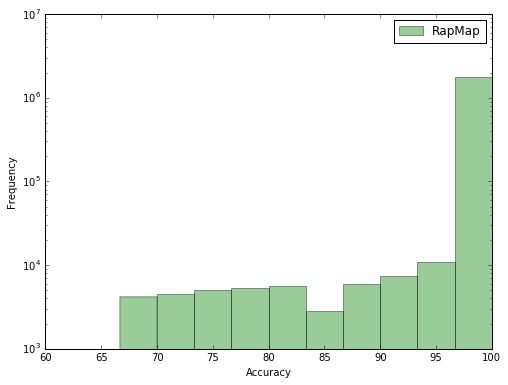

In [30]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))

criterion = only_last['read_name'].map(lambda x: 'SRR' in x)
only_star = 100.00 * only_last[criterion]['star_identity']/only_last[criterion]['star_alignment_len']
print "Mean of %Identity = ", (100.00 * sum(only_last[criterion]['star_identity'])/
                               sum(only_last[criterion]['star_alignment_len'])) 

only_star = only_star.values
print "Length of STAR = ", len(only_star)

plt.xlabel("Accuracy")
plt.ylabel("Frequency")

plt.hist(only_star, alpha=0.40, color='g', label='RapMap')
plt.xlim(60, 100)
plt.yscale('log', nonposy='clip')

plt.legend(loc='upper right')
plt.show()

In [57]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#from matplotlib_venn import venn3
#from matplotlib_venn import venn2

#fig = plt.figure(figsize=(16,16))
#fig_count = 111#221

mytool = 'NanoSTAR'
othertool = 'STAR'
"""
cnames = ['ref_name', 'ref_dir', 'read_name', 
          'nano_ref_len', 'nano_ref_start', 'nano_read_len', 
          'nano_alignment_len', 'nano_identity', 'nano_insertion', 'nano_deletion' , 'nano_mismatch',  
          'last_ref_len', 'last_ref_start', 'last_read_len', 
          'last_alignment_len', 'last_identity', 'last_insertion', 'last_deletion' , 'last_mismatch', 'status']

"""

print "NanoSTAR VS STAR: The following table is prepared considering only one alignment for each read. We choose the alignment which has maximum identity. If multiple alignments are found with maximum identity then the alignment to the lexicographically smallest reference is chosen."
print "Contained: Alignment coordinates exactly matches while aligning to the same reference for the two different alignment methods. Overlapped: Coordinates of one alignment is found within another while aligning to the same reference. Outside: Alignment coordinates of one alignment is completely outside of another alignment while aligning to the same reference."
print "Only NanoSTAR or STAR: Alignments of these reads were reported to different references by the two alignment methods. We need to analyze the alignments of these reads as well as the \'overlap\' and \'outside\' reads."
print ""

print "Total Nano\tTotal STAR\tContained\tOverlap\t\tOutside\t\tOnly Nano\tOnly STAR"
print "=========================================================================================================="

criterion = df_details['status'].map(lambda x: 'Nano' in x or x.startswith('Different'))
nano = df_details[criterion]['read_name']

criterion = df_details['status'].map(lambda x: 'Last' in x or x.startswith('Different'))
last = df_details[criterion]['read_name']

criterion1 = df_details['status'].map(lambda x: 'Contains' in x and x.startswith('Nano'))
df_nano = df_details[criterion1]['read_name']

criterion2 = df_details['status'].map(lambda x: 'Contains' in x and x.startswith('Last'))
df_last = df_details[criterion2]['read_name']

criterion3 = df_details['status'].map(lambda x: 'Outside' in x)
df_outside = df_details[criterion3]['read_name']

criterion4 = df_details['status'].map(lambda x: 'Overlap' in x)
df_overlap = df_details[criterion4]['read_name']

totalCommon = len(df_nano) + len(df_last) + len(df_outside) + len(df_overlap)
string = str(len(nano)) + "\t\t"
string += str(len(last)) + "\t\t"
string += str(len(df_nano) + len(df_last)) + '\t\t'
string += str(len(df_overlap)) + '\t\t';
string += str(len(df_outside)) + '\t\t'
string += str(len(nano) - totalCommon) + '\t\t'
string += str(len(last) - totalCommon)
print string


NanoSTAR VS STAR: The following table is prepared considering only one alignment for each read. We choose the alignment which has maximum identity. If multiple alignments are found with maximum identity then the alignment to the lexicographically smallest reference is chosen.
Contained: Alignment coordinates exactly matches while aligning to the same reference for the two different alignment methods. Overlapped: Coordinates of one alignment is found within another while aligning to the same reference. Outside: Alignment coordinates of one alignment is completely outside of another alignment while aligning to the same reference.
Only NanoSTAR or STAR: Alignments of these reads were reported to different references by the two alignment methods. We need to analyze the alignments of these reads as well as the 'overlap' and 'outside' reads.

Total Nano	Total STAR	Contained	Overlap		Outside		Only Nano	Only STAR
1797798		1797798		1650839		0		145608		1351		1351


# Analyzing Set of Contained Reads

Length of Contained =  1650839
Length of Color Array =  1650839


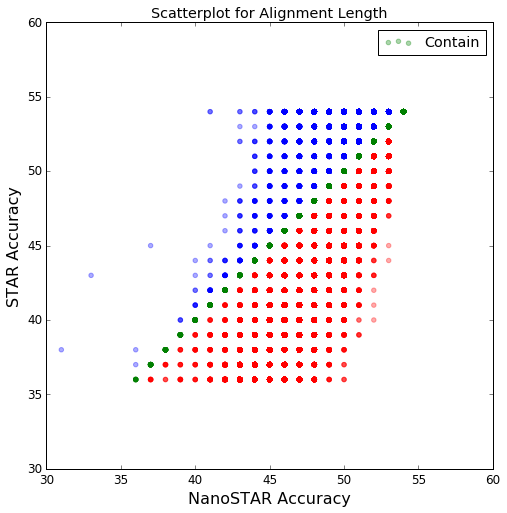

In [56]:
import csv
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.rcParams.update({'font.size': 12})

criterion = df_details['status'].map(lambda x: 'Contains' in x)
df_contains = df_details[criterion]
print "Length of Contained = ", len(df_contains)

nanostar = df_contains['nanostar_identity'].values 
star = df_contains['star_identity'].values
contains_color = []

for i in range(0, len(nanostar)):
    diff = nanostar[i] - star[i]
    if(diff > 0):
        contains_color.append('r')
    elif(diff == 0):
        contains_color.append('g')
    else:
        contains_color.append('b')
    #if(len(color_array) % 100000 == 0):
    #    break

print "Length of Color Array = ", len(contains_color)
    
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('NanoSTAR Accuracy', fontsize=16)
ax.set_ylabel('STAR Accuracy', fontsize=16)
ax.set_title("Scatterplot for Alignment Length")

ax.set_xlim(30, 60)
ax.set_ylim(30, 60)

plt.figtext(.15,.8, ftext, fontsize=14, ha='left')
plt.scatter(nanostar, star, color=contains_color, alpha=0.33, marker='o', label='Contain')

plt.legend(loc='upper right')
plt.show()


# Analyzing Set of Outside Reads

Length of Outside =  145608
Length of Color Array =  145608


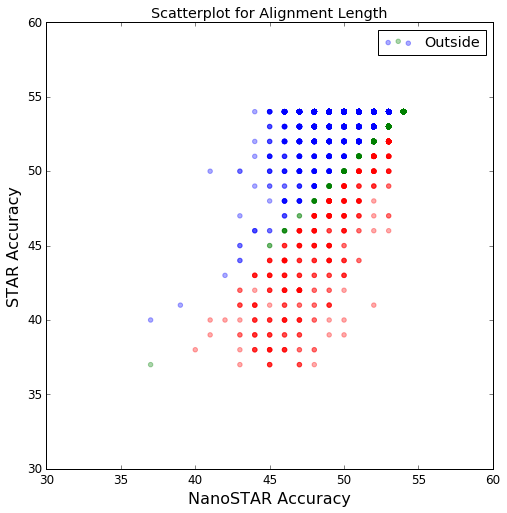

In [55]:
import csv
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.rcParams.update({'font.size': 12})

criterion = df_details['status'].map(lambda x: 'Outside' in x)
df_outside = df_details[criterion]
print "Length of Outside = ", len(df_outside)

nanostar = df_outside['nanostar_identity'].values 
star = df_outside['star_identity'].values
outside_color = []

for i in range(0, len(nanostar)):
    diff = nanostar[i] - star[i]
    if(diff > 0):
        outside_color.append('r')
    elif(diff == 0):
        outside_color.append('g')
    else:
        outside_color.append('b')
    #if(len(color_array) % 100000 == 0):
    #    break

print "Length of Color Array = ", len(outside_color)
    
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('NanoSTAR Accuracy', fontsize=16)
ax.set_ylabel('STAR Accuracy', fontsize=16)
ax.set_title("Scatterplot for Alignment Length")

ax.set_xlim(30, 60)
ax.set_ylim(30, 60)

plt.figtext(.15,.8, ftext, fontsize=14, ha='left')
plt.scatter(nanostar, star, color=outside_color, alpha=0.33, marker='o', label='Outside')

plt.legend(loc='upper right')
plt.show()
